In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the African Conflict Dataset
df = pd.read_excel('Africa_1997-2023_Jul21.xlsx')

In [34]:
# Get the number of conflicts of each type
n_conflict_per_type = df['EVENT_TYPE'].value_counts()

In [35]:
# Get bar names
bar_names = n_conflict_per_type.index.astype(str).to_list()

In [36]:
# Get maximum bar name string lengths
max_name_length = 0
for name in bar_names:
  max_name_length = max(max_name_length, len(name))

In [37]:
# Get total number of bars
n_bars = len(bar_names)

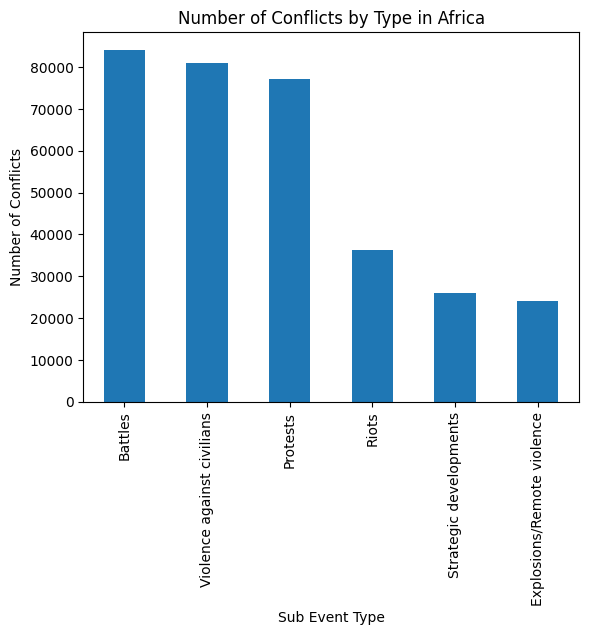

In [42]:
# Set x-axis label rotation after creating the plot
n_conflict_per_type.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Sub Event Type')
plt.ylabel('Number of Conflicts')
plt.title('Number of Conflicts by Type in Africa')
plt.savefig('bar_chart.jpg')

In [78]:
# Convert the EVENT_TYPE column to numerics
df['EVENT_TYPE'] = df['EVENT_TYPE'].astype('category').cat.codes
df['SUB_EVENT_TYPE'] = df['SUB_EVENT_TYPE'].astype('category').cat.codes

In [79]:
# Select the columns to use
df_filtered = df[['YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'INTERACTION', 'FATALITIES']]

In [80]:
# Drop rows where the number of fatalities is unknown
df_filtered = df_filtered.dropna(subset=['FATALITIES'])

In [81]:
# Calculate the correlation coefficient between fatalities and each of the other columns
correlations = df_filtered.corr()

In [82]:
# Print the correlation coefficients
print(correlations['FATALITIES'])

YEAR             -0.102387
EVENT_TYPE       -0.047607
SUB_EVENT_TYPE   -0.066426
INTERACTION      -0.057257
FATALITIES        1.000000
Name: FATALITIES, dtype: float64


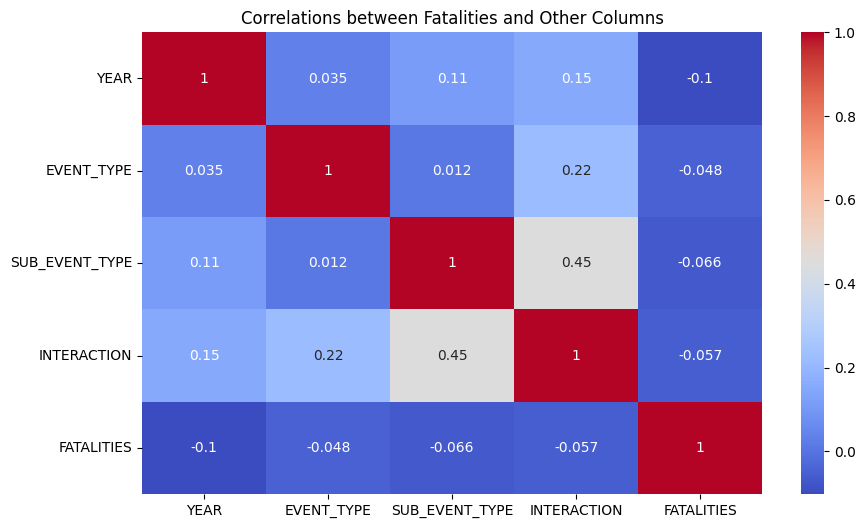

In [84]:
# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.title('Correlations between Fatalities and Other Columns')
plt.show()